## Implementation of multivariate linear regression

### About the dataset

This dataset contains the housing prices as a target value and two features namely
-  Size in square feets
-  No. of rooms in the house

Our main focus is to predict the housing price given the features. For this purpose we will be employing Multivariate linear regression model that we will build from scratch. It can also be implemented using scikit library of python but its good to understand how it actually works. 

Before proceeding further make sure you are acquanited with what linear regression actually is. 

-  Importing the important dependancies

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

-  importing the datset and preprocessing the data using pandas data analysis library

In [93]:
df=pd.read_csv('housing_price.csv')

#selecting the columns that we want
df=df.loc[:,{'size','rooms','price'}]

#preparing the numpy matrices from dataframes
targetValue=df.price.as_matrix().reshape(47,1)
roomX=df.rooms.as_matrix()
sizeX=df['size'].as_matrix()


In [96]:


import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='Enter-your-plotly-username-to-see-this-interactive-plot', api_key='Enter your-api-key')
z=targetValue
y=roomX
x=sizeX
figure=go.Scatter3d(
x=x,
y=y,
z=z,
mode='markers',
marker=dict(
        size=6,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
        xaxis=dict(
        title='Room Size'
    ),
    yaxis=dict(
        title='No. Of Rooms')
)
fig=go.Figure(data=[figure],layout=layout)
py.iplot(fig,filename='multivariate linear regression')


In [85]:
def mean_normalize(X1,X2):
    X1=(X1-np.mean(X1))/(np.std(X1))
    X2=(X2-np.mean(X2))/(np.std(X2))
    return (X1,X2)
    
    
x1,x2=mean_normalize(sizeX,roomX) 
features=np.round(np.vstack((x1,x2,np.ones_like(x1))).reshape(47,3),2)
theta=np.zeros((3,1))



In [86]:
def computeCost(X,y,theta):
    return (1.0/(2*47))*np.sum(np.power(np.dot(X,theta)-y,2))
#normalising target value too
mean_target=np.mean(targetValue)
std_target=np.std(targetValue)
targetValue_normalised=(targetValue-mean_target)/std_target


In [87]:
computeCost(features,targetValue_normalised,theta)

0.5

In [88]:

def gradientDescent(X,y,theta,alpha,num_iter):
    cost_array=[]
    for i in range(num_iter):
        y_estimate=np.dot(X,theta)
        m=y.shape[0]
        error=y_estimate-y
        cost_array.append(computeCost(X,y,theta))
        theta=theta-alpha*(1.0/m)*np.dot(X.T,error)
    return (theta,cost_array)

In [89]:
theta,cost=gradientDescent(features,targetValue_normalised,theta,0.001,15000)
theta=theta.tolist()
theta_list=[]
for i in range(3):
    theta_list.append(theta[i][0])


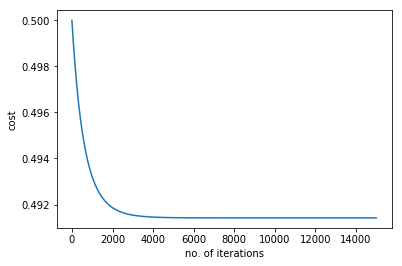

In [90]:
plt.plot([i for i in range(15000)],cost)
plt.xlabel('no. of iterations')
plt.ylabel('cost')

plt.show()

In [91]:
mean_size=np.mean(sizeX)
mean_room=np.mean(roomX)
std_size=np.std(sizeX)
std_room=np.std(roomX)
predict=theta_list[0]+theta_list[1]*((1600-mean_size)/(std_size))+theta_list[2]*((3-mean_room)/(std_room))
predict=(predict*std_target)+mean_target     #again converting to non-normalised form.
predict       


323554.84439503262

The targetValue for (x1=1600,x2=3) is 329900 and the predicted value is 323554.84439 which is quite close considering that there is no knowledge of learning rate alpha to us. We are just assuming it to be 0.001. Moreover changing the number of iterations also affects the result. So this is how the multivariate linear regression works.  